<a href="https://colab.research.google.com/github/venkateshdukuru/INTERNSHIP/blob/main/churn_prediction_(1)_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.shape

(7043, 21)

In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.groupby('Churn')[['MonthlyCharges', 'tenure']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure               
                 min     max       mean    min max       mean
Churn                                                        
No             18.25  118.75  61.265124      0  72  37.569965
Yes            18.85  118.35  74.441332      1  72  17.979133

TotalCharges columns has numeric values but looks object type.

In [8]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [10]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
data['TotalCharges'].isna().sum()

11

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [13]:
data['TotalCharges'].dtypes

dtype('float64')

In [14]:
data.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure                TotalCharges  \
                 min     max       mean    min max       mean          min   
Churn                                                                        
No             18.25  118.75  61.265124      0  72  37.569965        18.80   
Yes            18.85  118.35  74.441332      1  72  17.979133        18.85   

                             
           max         mean  
Churn                        
No     8672.45  2555.344141  
Yes    8684.80  1531.796094

Since, we have 11 null values in dataset, either we can fill them, or remove them. 11 is a low number, so I will drop them.

In [15]:
data.dropna(inplace = True)

In [16]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
data.shape

(7032, 21)

In [18]:
data.groupby('Churn')[['OnlineBackup', 'OnlineSecurity', 'PhoneService']].count()

,OnlineBackup,OnlineSecurity,PhoneService
Churn,,,
No,5163,5163,5163
Yes,1869,1869,1869


In [19]:
data['Churn'] = data['Churn'].map({'Yes' : 1, 'No' : 0})

In [20]:
data2 = data.drop(['customerID'], axis = 1)

To observe numerical, and numeric columns:

In [21]:
numerical = data2.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data2.columns.difference(numerical)

data2[categorical] = data2[categorical].astype('object')
print(f'Categorical: {categorical}')

Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

Categorical: Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender'],
      dtype='object')


In [22]:
data2 = pd.get_dummies(data2)

In [23]:
data2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [24]:
data_cols = data.drop('customerID', axis = 1)

for col in data_cols.columns:
    print(col, "\n")
    print(data[col].unique(), "\n")

gender 

['Female' 'Male'] 

SeniorCitizen 

[0 1] 

Partner 

['Yes' 'No'] 

Dependents 

['No' 'Yes'] 

tenure 

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService 

['No' 'Yes'] 

MultipleLines 

['No phone service' 'No' 'Yes'] 

InternetService 

['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 

['No' 'Yes' 'No internet service'] 

OnlineBackup 

['Yes' 'No' 'No internet service'] 

DeviceProtection 

['No' 'Yes' 'No internet service'] 

TechSupport 

['No' 'Yes' 'No internet service'] 

StreamingTV 

['No' 'Yes' 'No internet service'] 

StreamingMovies 

['No' 'Yes' 'No internet service'] 

Contract 

['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling 

['Yes' 'No'] 

PaymentMethod 

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges 

[29

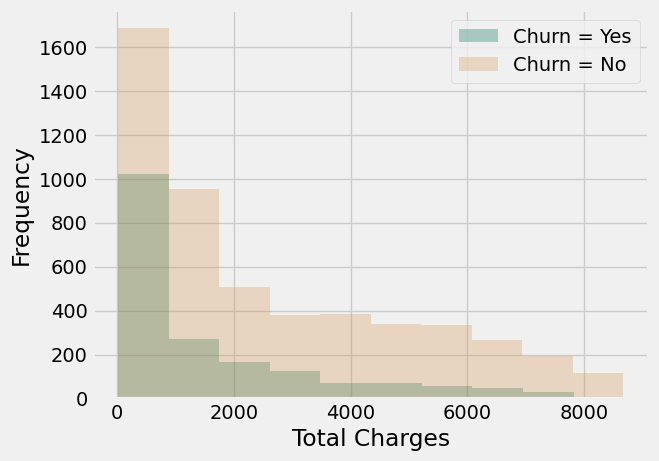

In [25]:
data[data['Churn'] == 1].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#016a55', label = 'Churn = Yes')

data[data['Churn'] == 0].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Total Charges')
plt.legend();

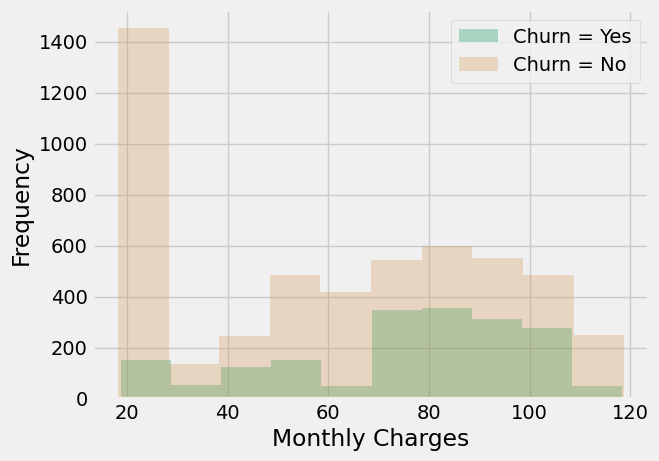

In [26]:
data[data['Churn'] == 1].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#019955', label = 'Churn = Yes')

data[data['Churn'] == 0].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Monthly Charges')
plt.legend();

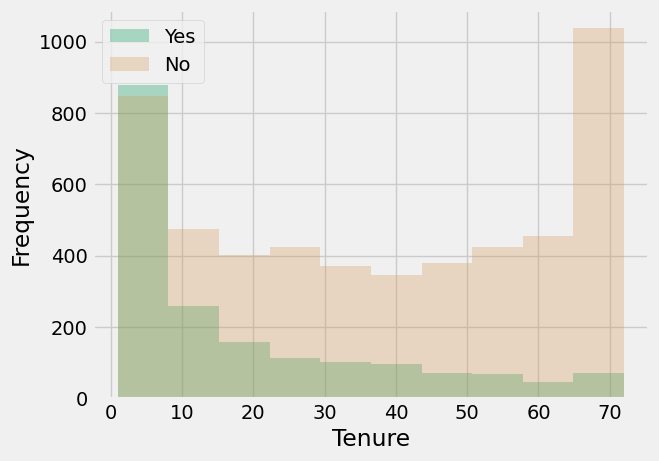

In [27]:
data[data['Churn'] == 1].tenure.plot(kind = 'hist', alpha = 0.3, color = '#019955', label = 'Yes')

data[data['Churn'] == 0].tenure.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'No')

plt.xlabel('Tenure')
plt.legend();

In [28]:
X = data2.drop('Churn', axis=1)

y = data2['Churn']

# Model Building

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

# Logistic Regression

In [56]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

In [57]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)

In [58]:
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

Accuracy score for test data : 0.8031021111589832
Accuracy score for train data : 0.8076841434939503


In [59]:
print(metrics.classification_report(log_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1822
           1       0.53      0.65      0.59       499

    accuracy                           0.80      2321
   macro avg       0.72      0.75      0.73      2321
weighted avg       0.82      0.80      0.81      2321



In [60]:
metrics.confusion_matrix(log_y_pred, y_test)

array([[1538,  284],
       [ 173,  326]])

In [61]:
metrics.confusion_matrix(log_y_pred_train, y_train)

array([[3104,  558],
       [ 348,  701]])

In [62]:
y_proba_log = log.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)

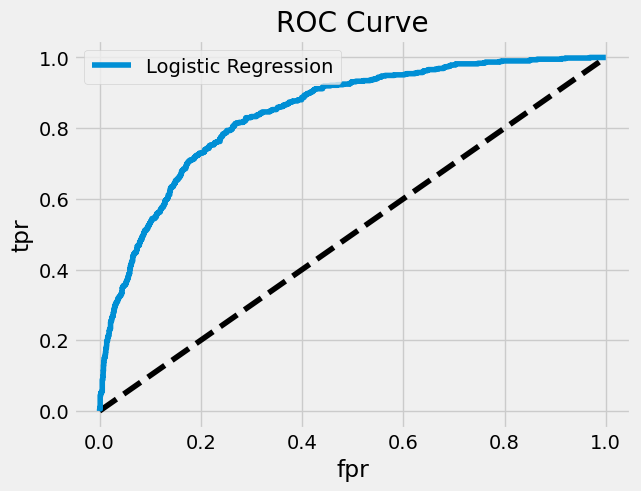

In [63]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [64]:
metrics.roc_auc_score(y_test, y_proba_log)

0.8422856923858161

In [65]:
y_proba_log_train = log.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(y_train, y_proba_log_train)

0.8468446651087834

# SVC

In [66]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [67]:
y_pred_svc = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc_train_as = metrics.accuracy_score(y_train, y_pred_train)
svc_as = metrics.accuracy_score(y_test, y_pred_svc)

In [68]:
print(f"Accuracy score for test data : {svc_as}")
print(f"Accuracy score for train data : {svc_train_as}")

Accuracy score for test data : 0.7371822490305903
Accuracy score for train data : 0.73275313097007


In [69]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1711
           1       0.00      0.00      0.00       610

    accuracy                           0.74      2321
   macro avg       0.37      0.50      0.42      2321
weighted avg       0.54      0.74      0.63      2321



In [70]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [71]:
svc_sc = SVC()
svc_sc.fit(X_train_sc, y_train)

y_pred_sc = svc_sc.predict(X_test_sc)
y_pred_sc_train = svc_sc.predict(X_train_sc)

svc_sc_train_as = metrics.accuracy_score(y_train, y_pred_sc_train)
svc_sc_as = metrics.accuracy_score(y_test, y_pred_sc)

In [72]:
print(f"Accuracy score for test data : {svc_sc_as}")
print(f"Accuracy score for train data : {svc_sc_train_as}")

Accuracy score for test data : 0.7970702283498492
Accuracy score for train data : 0.8193589471449798


In [73]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_train_dt = decision_tree.predict(X_train)

In [74]:
dt_as = metrics.accuracy_score(y_test, y_pred_dt)
dt_as_train = metrics.accuracy_score(y_train, y_pred_train_dt)

print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}")

Accuracy score for test data : 0.7221025420077553
Accuracy score for train data : 0.9987263850562513


# Random Forest Classifier

In [75]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)

In [76]:
rf_as = metrics.accuracy_score(y_test, y_pred_rf)
rf_as_train = metrics.accuracy_score(y_train, y_pred_train_rf)

print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}")

Accuracy score for test data : 0.7832830676432572
Accuracy score for train data : 0.9985141158989599
